## Mark EDA for Housing Project

### Import Libraries and Load Data

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the provided data set (csv)
plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')


In [4]:
print(df.shape)
display(df.info())
display('-'*60)
display(df.isnull().any())
display(df.isnull().sum())
display('-'*60)
df.head()

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

'------------------------------------------------------------'

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'------------------------------------------------------------'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


None

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df.zipcode.nunique()

70

In [15]:
n = df.nunique(axis=0) 
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64


In [18]:
# Group columns into similar types of data and to make df easier to work with...
# Seperate groups of features into seperate dataframes: counts, size, condition
df_counts = df[['price','floors', 'bedrooms', 'bathrooms', 'waterfront', 'view']]
df_counts.head()

,price,floors,bedrooms,bathrooms,waterfront,view
0,221900.0,1.0,3,1.00,NaN,0.0
1,538000.0,2.0,3,2.25,0.0,0.0
2,180000.0,1.0,2,1.00,0.0,0.0
3,604000.0,1.0,4,3.00,0.0,0.0
4,510000.0,1.0,3,2.00,0.0,0.0


In [19]:
df_condition = df[['price','condition', 'grade', 'yr_built', 'yr_renovated']]
df_condition.head()

,price,condition,grade,yr_built,yr_renovated
0,221900.0,3,7,1955,0.0
1,538000.0,3,7,1951,1991.0
2,180000.0,3,6,1933,NaN
3,604000.0,5,7,1965,0.0
4,510000.0,3,8,1987,0.0


In [20]:
df_size = df[['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]
df_size.head()

,price,sqft_lot,sqft_living,sqft_above,sqft_basement,sqft_lot15,sqft_living15
0,221900.0,5650,1180,1180,0.0,5650,1340
1,538000.0,7242,2570,2170,400.0,7639,1690
2,180000.0,10000,770,770,0.0,8062,2720
3,604000.0,5000,1960,1050,910.0,5000,1360
4,510000.0,8080,1680,1680,0.0,7503,1800


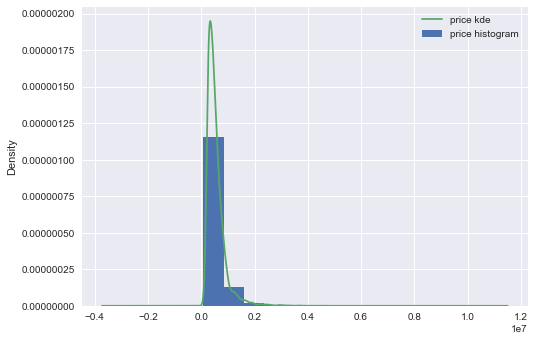

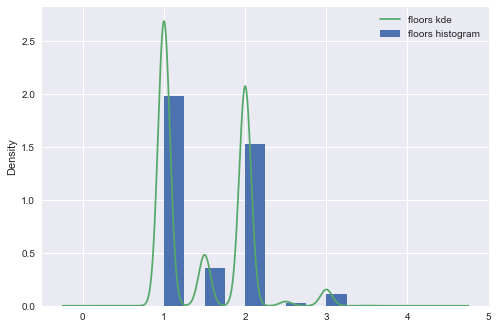

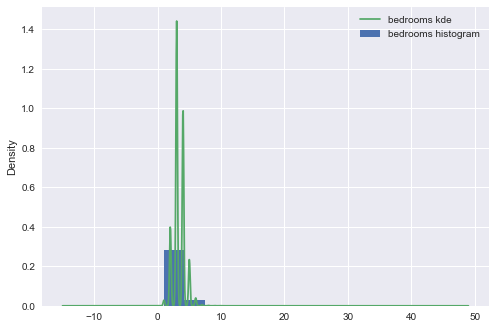

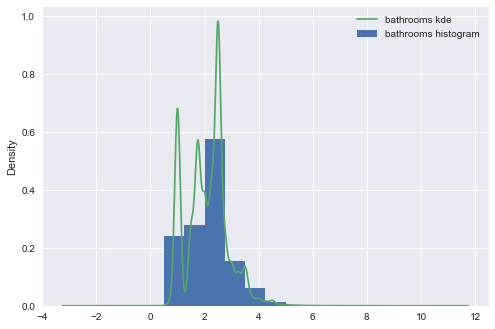

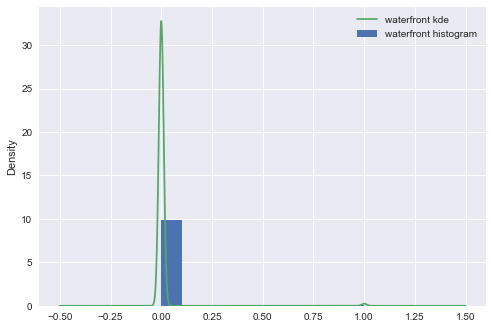

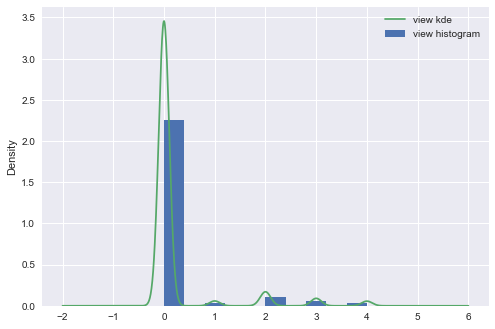

In [21]:
# Take a look at the distributions of some key features
for column in df_counts:
    df_counts[column].plot.hist(density=True, label = column+' histogram')
    df_counts[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

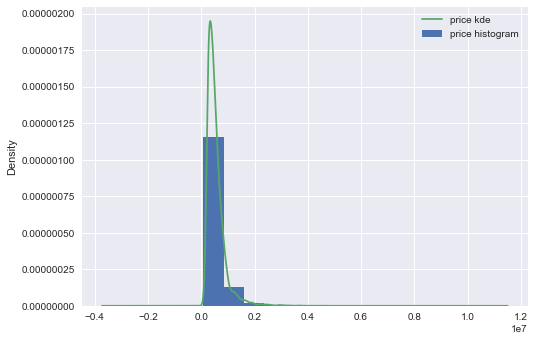

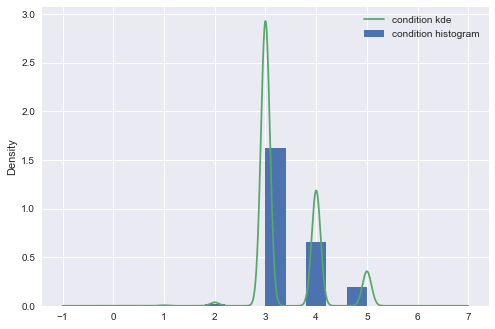

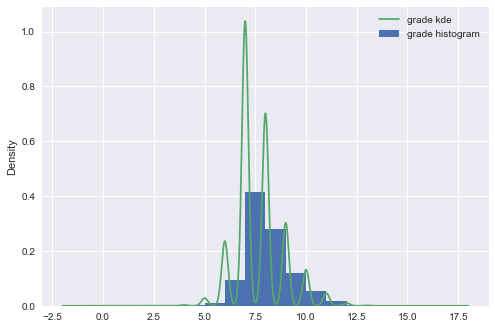

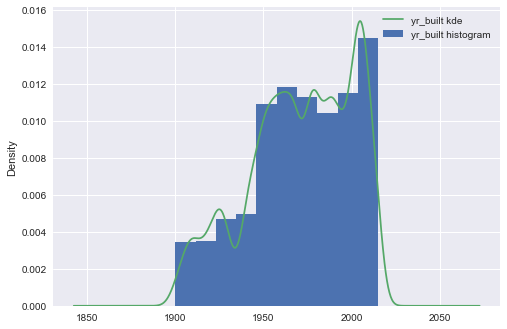

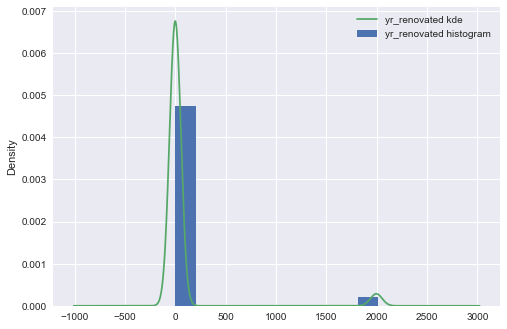

In [22]:
for column in df_condition:
    df_condition[column].plot.hist(density=True, label = column+' histogram')
    df_condition[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

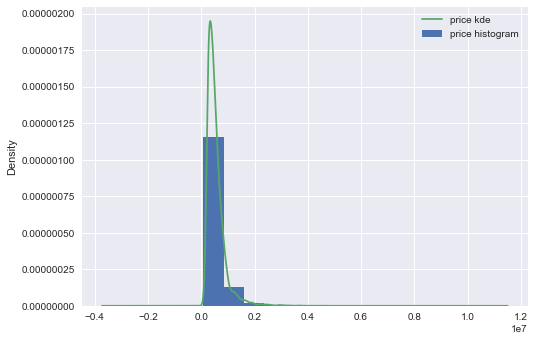

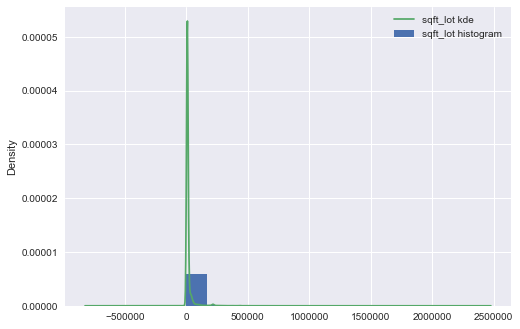

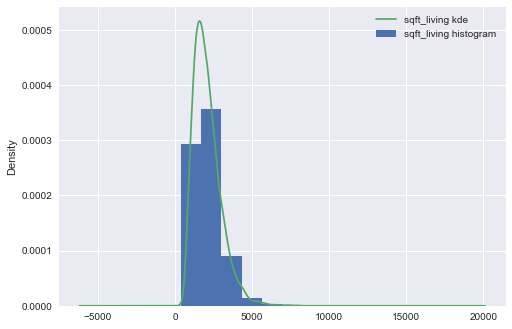

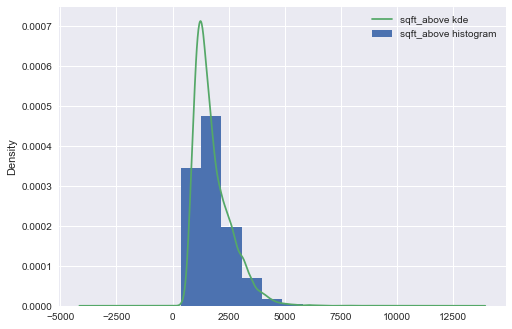

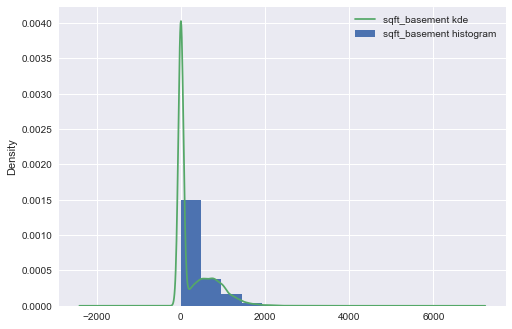

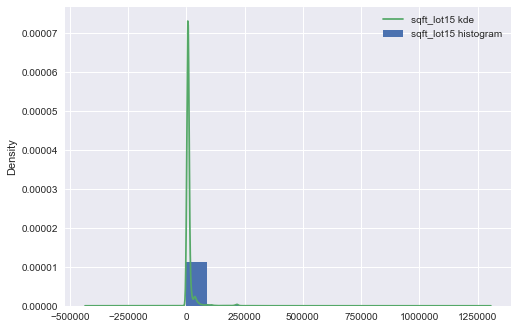

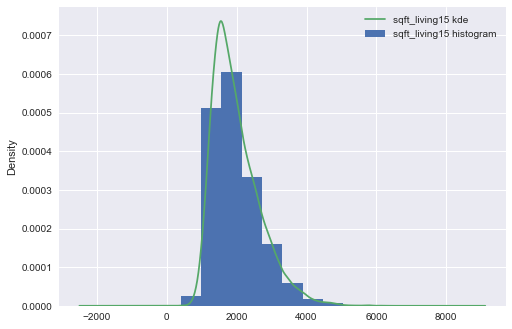

In [23]:
for column in df_size:
    df_size[column].plot.hist(density=True, label = column+' histogram')
    df_size[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Text(0.5, 0, 'House Grade')

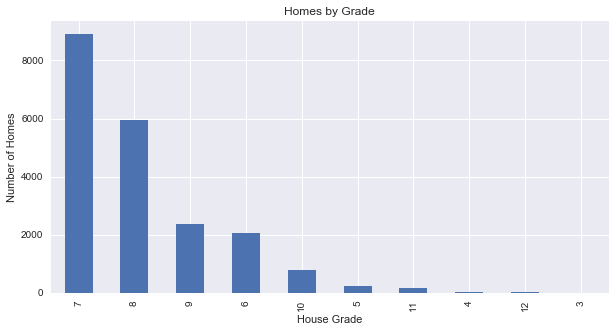

In [108]:
# Some more vizualization...bar charts

df3_remove['grade'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Homes by Grade')
plt.ylabel('Number of Homes')
plt.xlabel('House Grade')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c4d5b00>,
      dtype=object)

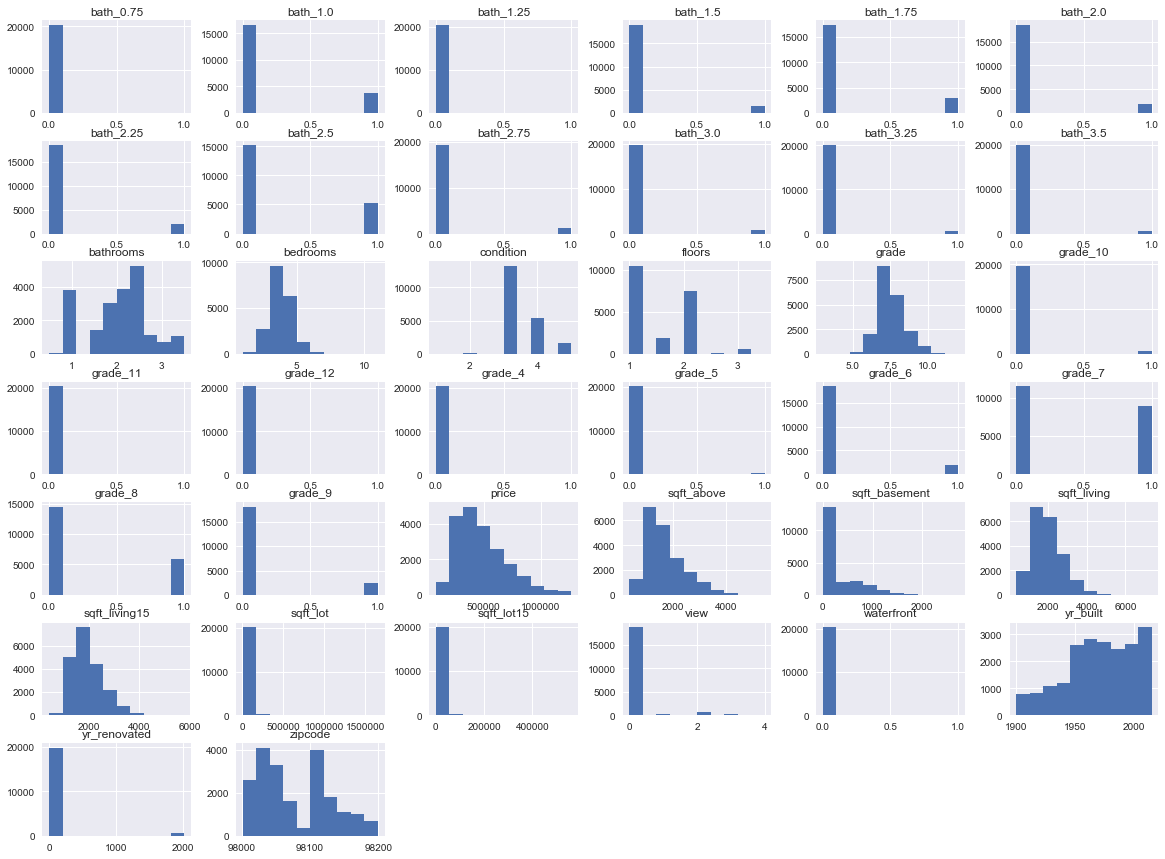

In [107]:
# Simple histograms...
df3_remove.hist(figsize=(20,15))

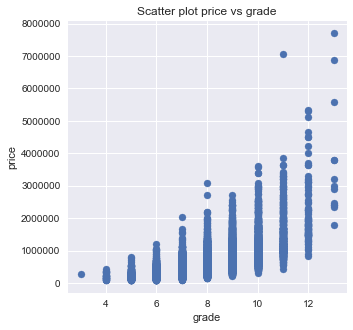

In [110]:
# scatter plot...

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_condition['grade'], df['price'])
plt.title('Scatter plot price vs grade')
ax.set_xlabel('grade')
ax.set_ylabel('price')
plt.show()

In [ ]:
# more scatter plot examples...
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='ehp', y='msrp', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='highway_mpg', y='msrp', ax=axs[1])
df.plot(kind='scatter', x='city_mpg', y='msrp', ax=axs[2])

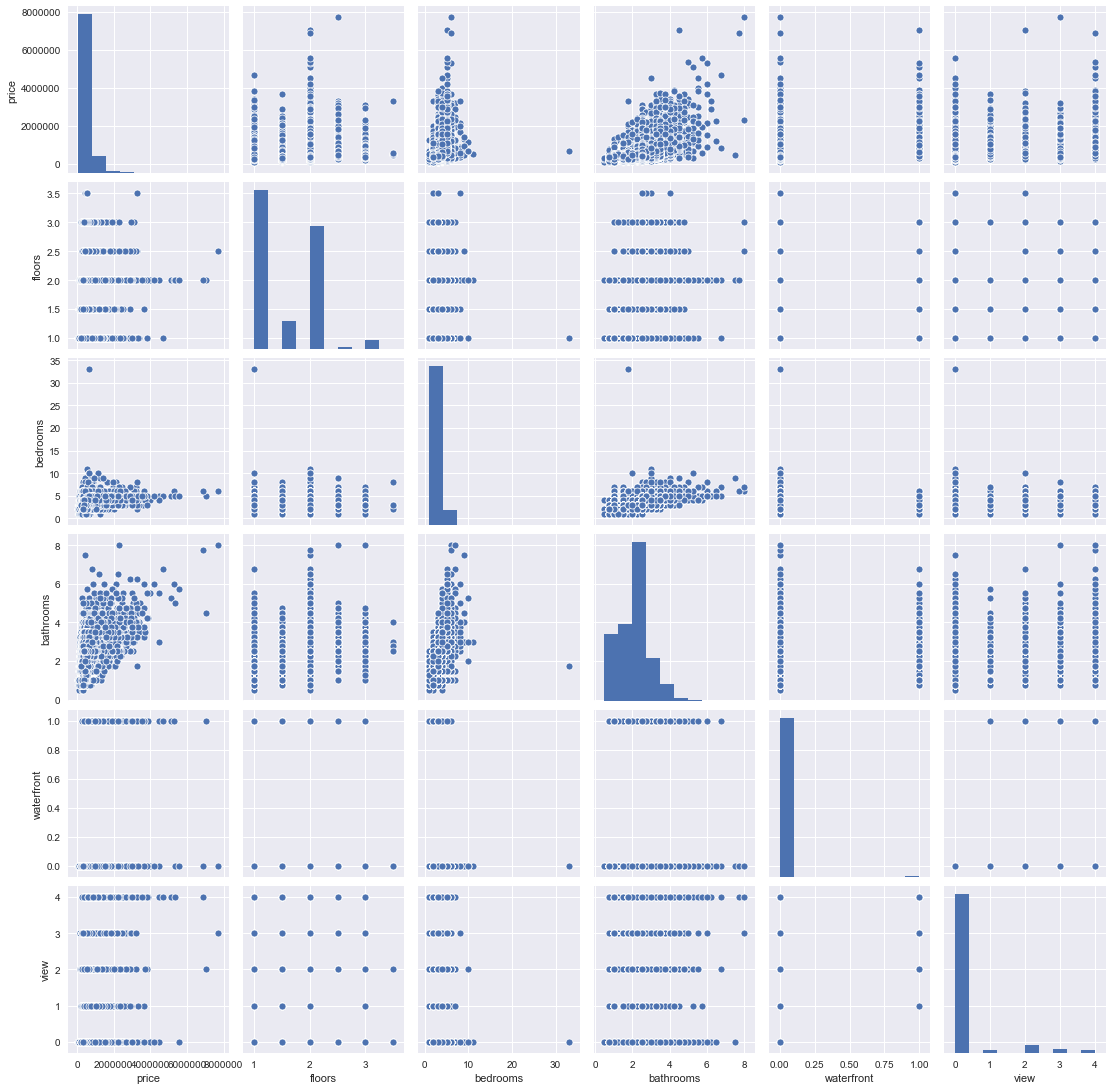

In [24]:
# Take a look at scatter plots and look for linear relationships
# sns.pairplot(data[['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']])
sns.pairplot(df_counts)

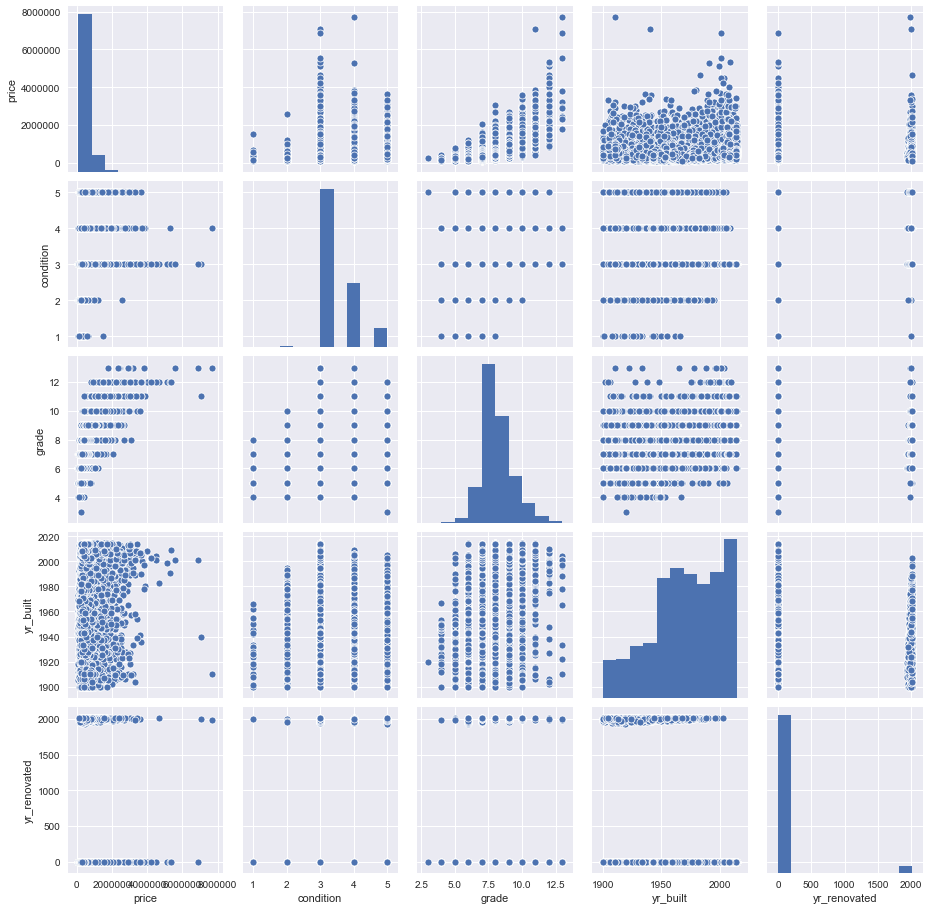

In [25]:
sns.pairplot(df_condition)

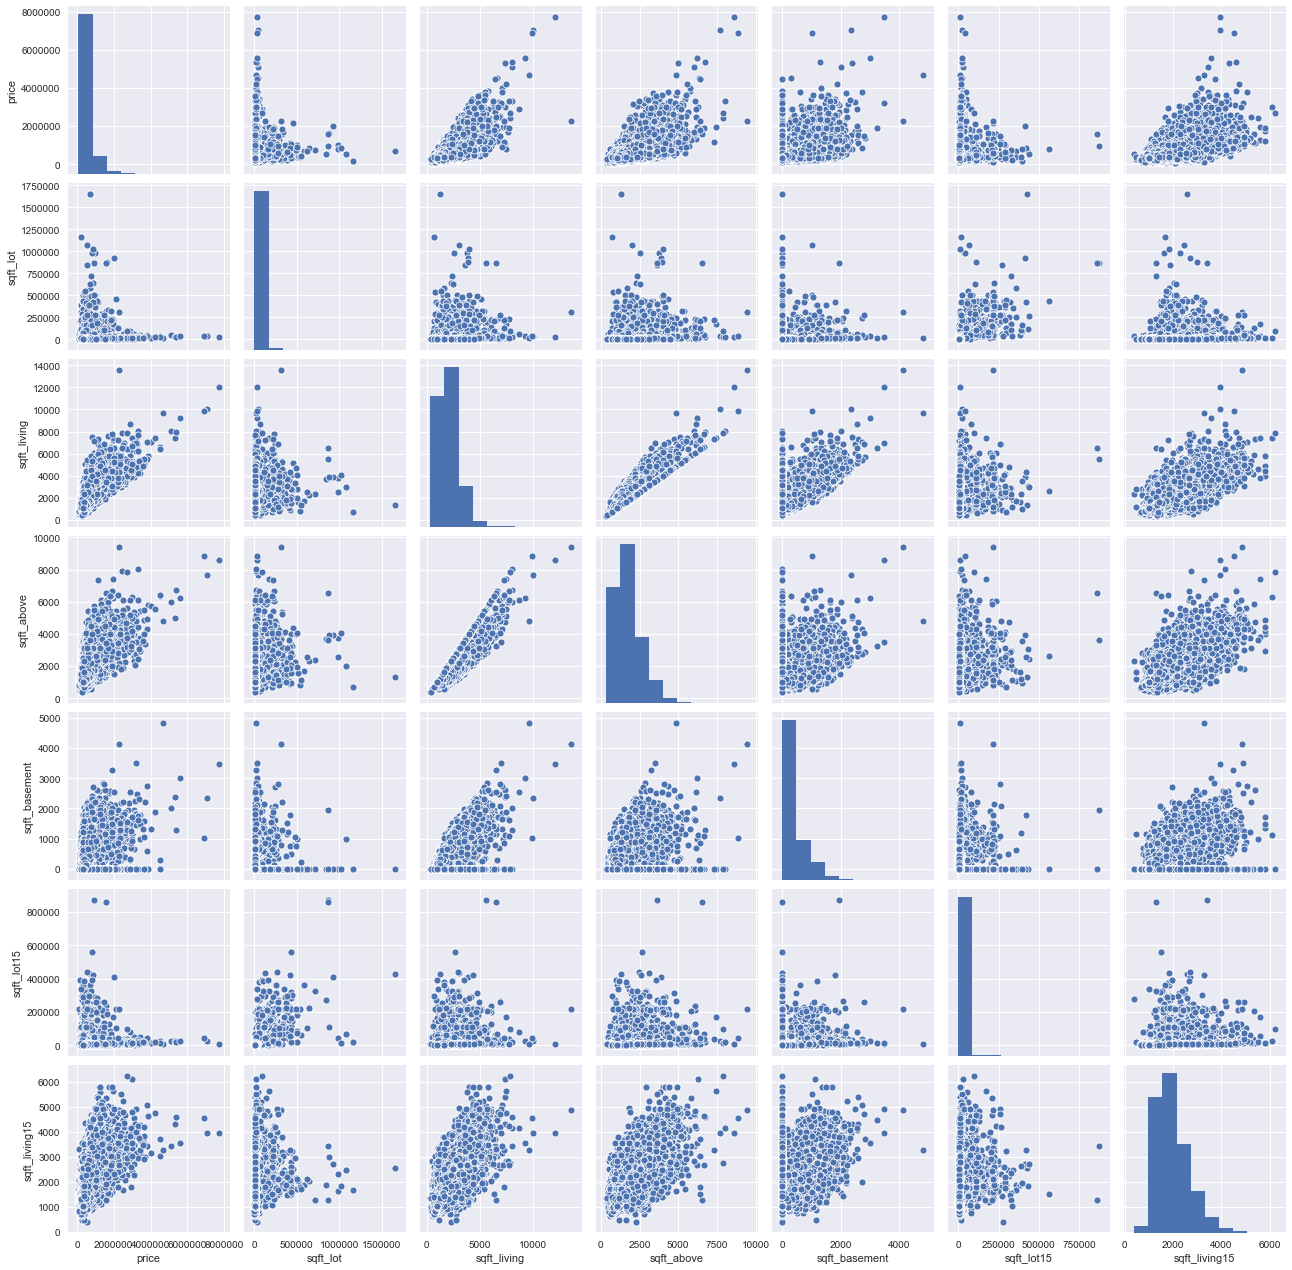

In [26]:
sns.pairplot(df_size)

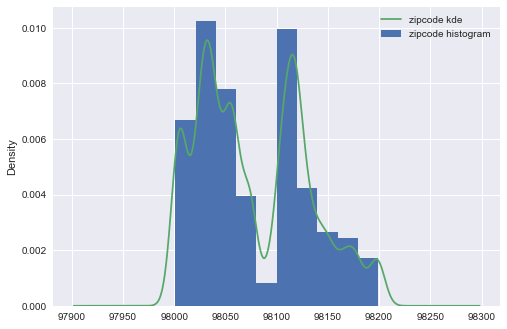

In [30]:
# forgot to look at zipcode... 
df.zipcode.plot.hist(density=True, label = 'zipcode histogram')
df.zipcode.plot.kde(label ='zipcode kde')
plt.legend()
plt.show()

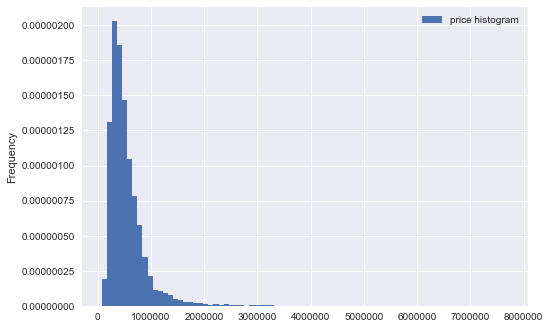

In [186]:
df.price.plot.hist(density=True, bins=80, label = 'price histogram')
plt.legend()
plt.show()

In [32]:
# Take a look at correlations between variables
# first drop a few unnecessary columns (id, date, lat, long)
df_1 = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [33]:
df_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.325008,0.053953,0.129599,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.302683,0.155670,0.018495,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.282693,0.507173,0.051050,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.434576,0.318152,0.055660,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015533,0.052946,0.004513,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.245144,0.489193,0.003535,-0.059541,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.090200,-0.026079,0.087244,0.031057,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.276521,-0.054564,0.100964,0.085277,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.170972,-0.361592,-0.061858,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.168023,0.447865,0.016669,-0.185771,0.713867,0.120981


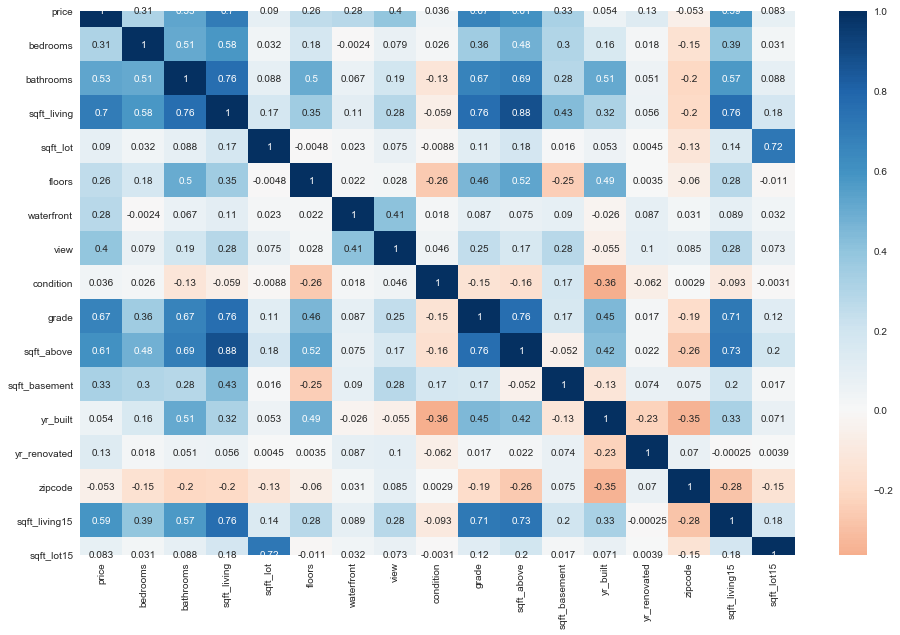

In [41]:
corr = df_1.corr()
display(corr)
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='RdBu', annot=True, center=0)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

In [42]:
# Change nulls to 0 for 4 columns
df_2 = df_1.replace(np.NaN, 0.0)


In [45]:
df_2.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,2390,7570


In [44]:
df_2.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [101]:
df_2.shape

(21597, 17)

In [66]:
# get rid of outliers for price (2 SD from mean)
# get rid of 33 value in bedrooms
df2_remove = df_2[(np.abs(stats.zscore(df_2['price']) < 2))]

In [81]:
df2_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [86]:
df2_remove = df2_remove.loc[df2_remove['bedrooms'] < 33]

In [88]:
df2_remove.shape

(20755, 17)

In [70]:
df2_remove['bedrooms'].unique()
df2_remove['bedrooms'].value_counts()

3     9666
4     6470
2     2744
5     1392
6      238
1      196
7       32
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [75]:
df2_remove['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3030
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
3.75     102
4.00      83
0.75      71
4.50      55
4.25      37
5.00      10
1.25       8
4.75       5
5.25       4
0.50       4
5.50       2
5.75       1
6.00       1
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

In [76]:
df_2['floors'].unique()
df2_remove['floors'].value_counts()

1.0    10502
2.0     7691
1.5     1859
3.0      578
2.5      120
3.5        6
Name: floors, dtype: int64

In [73]:
print(df_2.shape)
print(df2_remove.shape)

(21597, 17)
(20756, 17)


In [77]:
df2_remove['view'].value_counts()

0.0    19067
2.0      843
3.0      383
1.0      286
4.0      177
Name: view, dtype: int64

In [78]:
df2_remove['waterfront'].value_counts()

0.0    20694
1.0       62
Name: waterfront, dtype: int64

In [79]:
df2_remove['condition'].value_counts()

3    13481
4     5486
5     1592
2      169
1       28
Name: condition, dtype: int64

In [80]:
df2_remove['grade'].value_counts()

7     8967
8     5996
9     2421
6     2038
10     861
5      242
11     195
4       27
12       8
3        1
Name: grade, dtype: int64

In [90]:
# Create dummies for grade
grade_dummies = pd.get_dummies(df2_remove['grade'], prefix='grade', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df3_remove = pd.concat([df2_remove, grade_dummies], axis=1)
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,0,0,0,1,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,7639,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,8062,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,5000,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,7503,0,0,0,0,1,0,0,0,0


In [91]:
# Cut outliers for bathroom, then create dummies
df3_remove = df3_remove[(np.abs(stats.zscore(df3_remove['bathrooms']) < 2))]
df3_remove['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
0.75      71
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [92]:
# Create dummies for bathrooms
bathrooms_dummies = pd.get_dummies(df3_remove['bathrooms'], prefix='bath', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df3_remove = pd.concat([df3_remove, bathrooms_dummies], axis=1)
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,0,0,1,0,0,0,0,0,0


In [93]:
pd.set_option('display.max_columns', None)

In [94]:
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [100]:
df3_remove.shape

(20452, 38)

In [105]:
df3_remove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20452 entries, 0 to 21596
Data columns (total 38 columns):
price            20452 non-null float64
bedrooms         20452 non-null int64
bathrooms        20452 non-null float64
sqft_living      20452 non-null int64
sqft_lot         20452 non-null int64
floors           20452 non-null float64
waterfront       20452 non-null float64
view             20452 non-null float64
condition        20452 non-null int64
grade            20452 non-null int64
sqft_above       20452 non-null int64
sqft_basement    20452 non-null float64
yr_built         20452 non-null int64
yr_renovated     20452 non-null float64
zipcode          20452 non-null int64
sqft_living15    20452 non-null int64
sqft_lot15       20452 non-null int64
grade_4          20452 non-null uint8
grade_5          20452 non-null uint8
grade_6          20452 non-null uint8
grade_7          20452 non-null uint8
grade_8          20452 non-null uint8
grade_9          20452 non-null uint8
gra

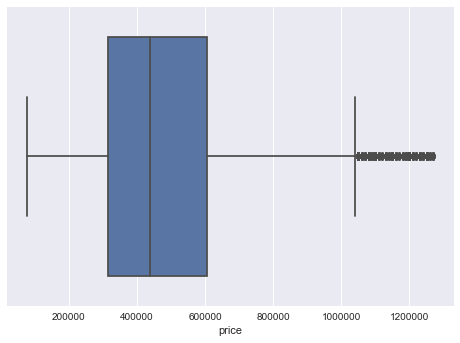

In [106]:
sns.boxplot(x=df3_remove['price'])

In [ ]:
# Thinking about binning price: low, mid, high... and focus on med for our biz case
# low < 315 , mid = 315 to 605, high > 605  NOTE: cutoff for outliers = 1,040K (+or- 1.5*IQR)

In [114]:
# price_bands = 0 - 315000, 315001 to 605000, 605001 to 1270000
df3_high = df3_remove.loc[df3_remove['price'] > 605001]

In [122]:
print(df3_high.shape)
print(df3_low.shape)

(5086, 38)
(5039, 38)


In [127]:
df3_high.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
10,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,1860,1700.0,1965,0.0,98007,2210,8925,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,3,9,1980,970.0,1979,0.0,98126,2140,4000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,3,8,1750,700.0,1915,0.0,98119,1760,3573,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27,667000.0,3,1.00,1400,1581,1.5,0.0,0.0,5,8,1400,0.0,1909,0.0,98112,1860,3861,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
29,719000.0,4,2.50,2570,7173,2.0,0.0,0.0,3,8,2570,0.0,2005,0.0,98052,2630,6026,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [115]:
df3_low = df3_remove.loc[df3_remove['price'] < 315000]

In [133]:
df3_med = df3_remove.loc[(df3_remove['price'] >= 315000) & (df3_remove['price'] <= 605001)]
# result = dfclean[(dfclean['price']< 605001) & (dfclean['price']> 315000)]

In [134]:
df3_med.shape

(10327, 38)

In [111]:
df3_remove.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
count,2.045200e+04,20452.000000,20452.000000,20452.000000,2.045200e+04,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000
mean,4.824466e+05,3.318942,2.034581,1971.131527,1.442586e+04,1.473988,0.002934,0.180227,3.409544,7.537209,1703.154313,262.426951,1970.612165,60.877127,98078.546304,1925.906904,12323.607667,0.001320,0.011833,0.099599,0.436339,0.290241,0.115294,0.037796,0.007236,0.000293,0.003472,0.188197,0.000391,0.070360,0.148103,0.093732,0.097203,0.257677,0.055447,0.033982,0.022638,0.028604
std,2.198012e+05,0.867106,0.674796,763.014605,3.907029e+04,0.536213,0.054085,0.658488,0.648611,1.041994,716.047483,406.546542,29.183358,343.183834,53.392555,617.946162,25521.745139,0.036311,0.108135,0.299472,0.495943,0.453884,0.319385,0.190707,0.084761,0.017126,0.058819,0.390879,0.019774,0.255759,0.355211,0.291462,0.296242,0.437366,0.228856,0.181187,0.148751,0.166694
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,1470.000000,5046.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.380000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,1800.000000,7552.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.050000e+05,4.000000,2.500000,2430.000000,1.034450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,500.000000,1996.000000,0.000000,98118.000000,2280.000000,9900.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.270000e+06,11.000000,3.500000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2720.000000,2015.000000,2015.000000,98199.000000,5790.000000,560617.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
# Should drop the original columns from the dummy creation: 
df4_remove = df3_remove.drop(['bathrooms','grade'],axis=1)

In [147]:
df4_remove.shape

(20452, 36)

In [146]:
df4_remove.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,770,10000,1.0,0.0,0.0,3,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [153]:
# Chek for duplicates
duplicate_rows_df = df4_remove[df4_remove.duplicated()]
print(duplicate_rows_df.shape)
duplicate_rows_df

(6, 36)


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
3947,550000.0,4,2410,8447,2.0,0.0,3.0,4,2060,350.0,1936,1980.0,98074,2520,14789,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4348,259950.0,2,1070,649,2.0,0.0,0.0,3,720,350.0,2008,0.0,98106,1070,928,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14969,585000.0,3,2290,5089,2.0,0.0,0.0,3,2290,0.0,2001,0.0,98006,2290,7984,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20038,555000.0,3,1940,3211,2.0,0.0,0.0,3,1940,0.0,2009,0.0,98027,1880,3078,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20508,529500.0,3,1410,905,3.0,0.0,0.0,3,1410,0.0,2014,0.0,98116,1510,1352,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21458,359800.0,5,2170,2752,2.0,0.0,0.0,3,2170,0.0,2014,0.0,98106,1800,2752,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [152]:
df4_remove.shape

(20452, 36)

In [95]:
# Create train, text split (75% in train)... using this method for easy use with statsmodels
train, test = train_test_split(df3_remove)




In [ ]:
# FOUND: The code to use for train_test_split
# train, test = train_test_split(data, test_size=0.2, random_state=42)
# Alternative method
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(len(X_train), len(X_test), len(y_train), len(y_test))

In [97]:
train.shape

(15339, 38)

In [98]:
test.shape

(5113, 38)

In [99]:
# save df3_remove as csv file and upload to our repository
df3_remove.to_csv(r'data/df3clean.csv')

In [102]:
# Taking a closer look at descriptives again (add in the 2 SD from mean measure)
desc_df = df3_remove.describe()
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*2)
desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
count,2.045200e+04,20452.000000,20452.000000,20452.000000,2.045200e+04,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000
mean,4.824466e+05,3.318942,2.034581,1971.131527,1.442586e+04,1.473988,0.002934,0.180227,3.409544,7.537209,1703.154313,262.426951,1970.612165,60.877127,98078.546304,1925.906904,12323.607667,0.001320,0.011833,0.099599,0.436339,0.290241,0.115294,0.037796,0.007236,0.000293,0.003472,0.188197,0.000391,0.070360,0.148103,0.093732,0.097203,0.257677,0.055447,0.033982,0.022638,0.028604
std,2.198012e+05,0.867106,0.674796,763.014605,3.907029e+04,0.536213,0.054085,0.658488,0.648611,1.041994,716.047483,406.546542,29.183358,343.183834,53.392555,617.946162,25521.745139,0.036311,0.108135,0.299472,0.495943,0.453884,0.319385,0.190707,0.084761,0.017126,0.058819,0.390879,0.019774,0.255759,0.355211,0.291462,0.296242,0.437366,0.228856,0.181187,0.148751,0.166694
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,1470.000000,5046.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.380000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,1800.000000,7552.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.050000e+05,4.000000,2.500000,2430.000000,1.034450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,500.000000,1996.000000,0.000000,98118.000000,2280.000000,9900.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.270000e+06,11.000000,3.500000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2720.000000,2015.000000,2015.000000,98199.000000,5790.000000,560617.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
+2_std,9.220490e+05,5.053153,3.384173,3497.160738,9.256644e+04,2.546414,0.111105,1.497203,4.706766,9.621196,3135.249279,1075.520034,2028.978880,747.244796,98185.331413,3161.799228,63367.097944,0.073942,0.228102,0.698543,1.428224,1.198009,0.754064,0.419209,0.176759,0.034545,0.121109,0.969954,0.039940,0.581877,0.858524,0.676656,0.689686,1.132408,0.513159,0.396357,0.320141,0.361991
-2_std,4.284423e+04,1.584730,0.684989,445.102317,-6.371472e+04,0.401562,-0.105237,-1.136749,2.112322,5.453222,271.059346,-550.666132,1912.2454

In [ ]:
# Wed afternoon... rename colums for bathrooms dummies due to formatting with decimel points
# run model with many dummies and other variables - but on df4_remove dataset... reasonable R2
# Wed. early afternoon ... ran abotu 7 models all very poor performance

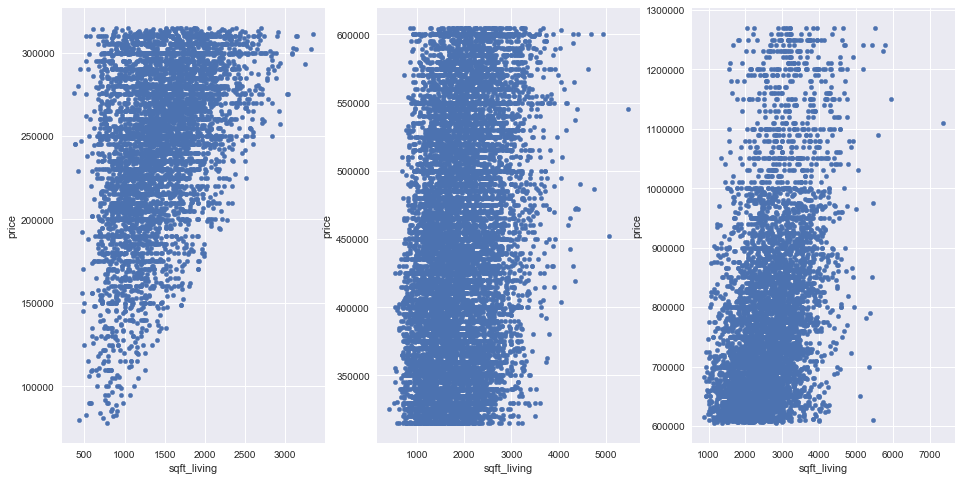

In [154]:
# Wed evening do more visualizing with new data frames

fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='sqft_living', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='sqft_living', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='sqft_living', y='price', ax=axs[2])

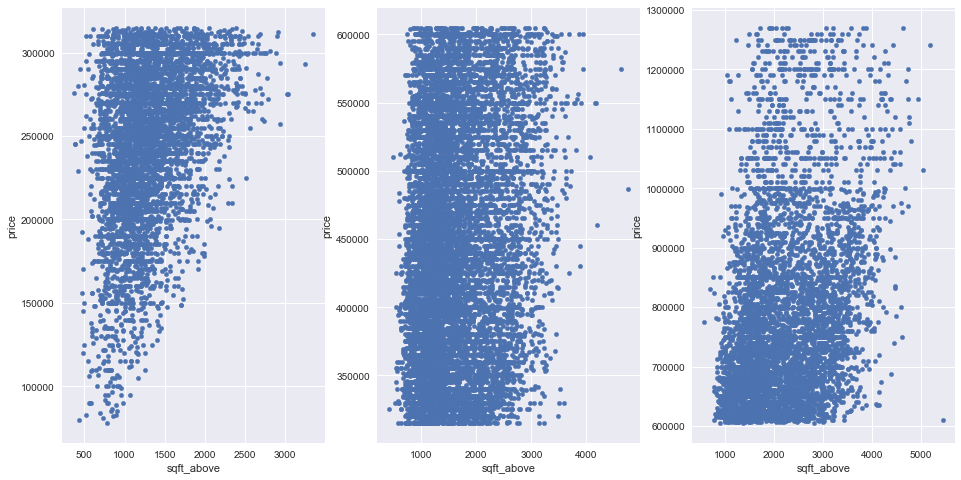

In [155]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='sqft_above', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='sqft_above', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='sqft_above', y='price', ax=axs[2])

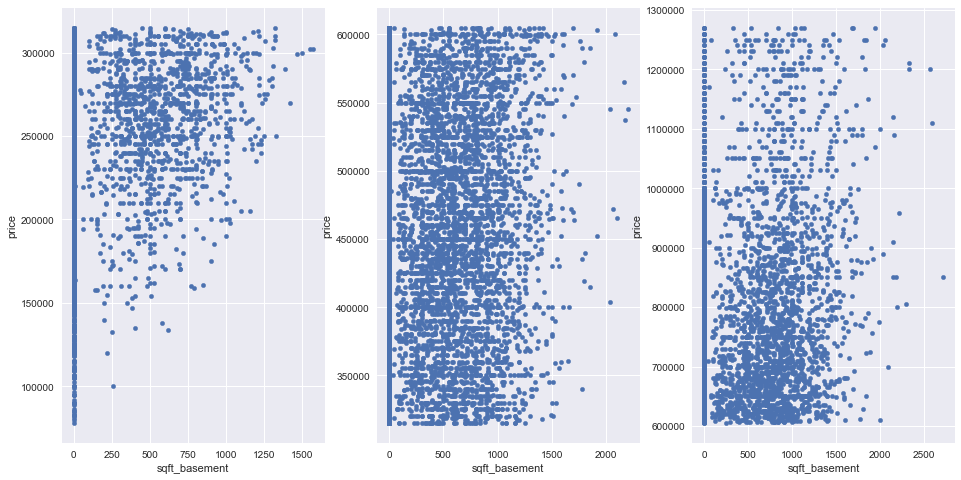

In [167]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='sqft_basement', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='sqft_basement', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='sqft_basement', y='price', ax=axs[2])

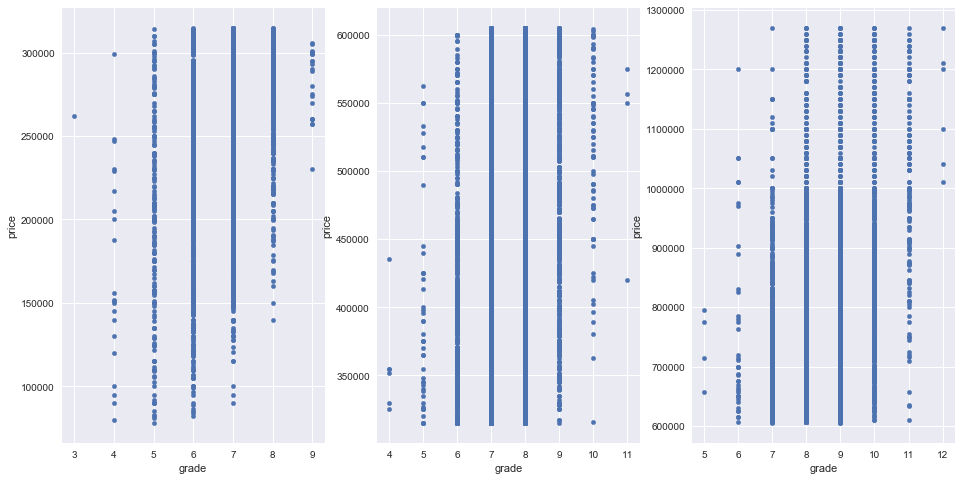

In [156]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='grade', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='grade', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='grade', y='price', ax=axs[2])

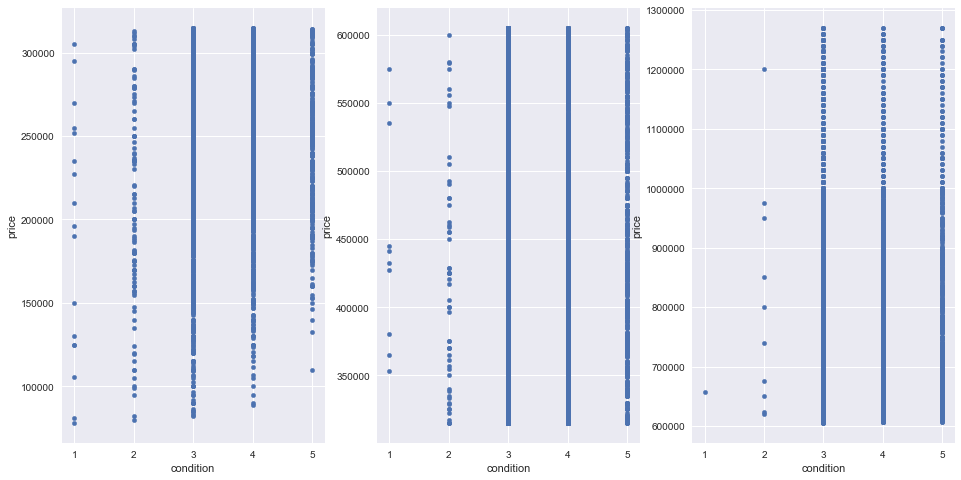

In [178]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='condition', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='condition', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='condition', y='price', ax=axs[2])

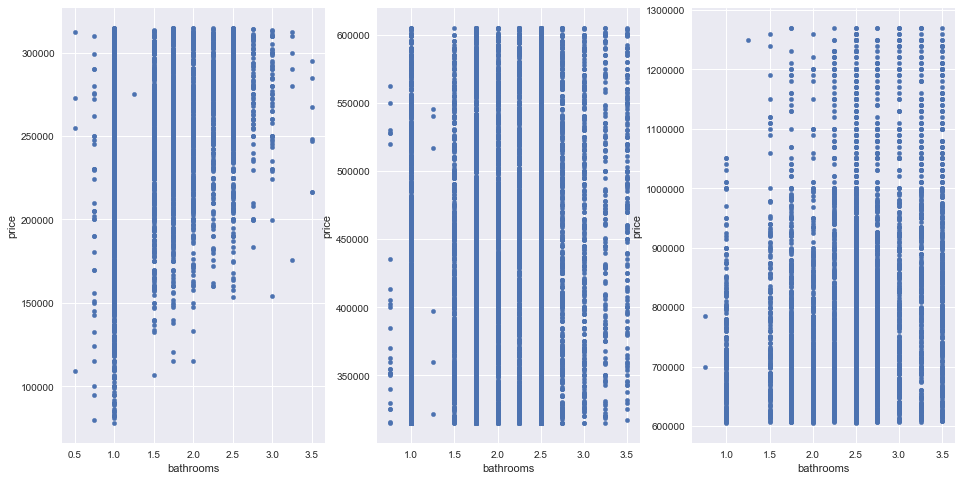

In [160]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='bathrooms', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='bathrooms', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='bathrooms', y='price', ax=axs[2])

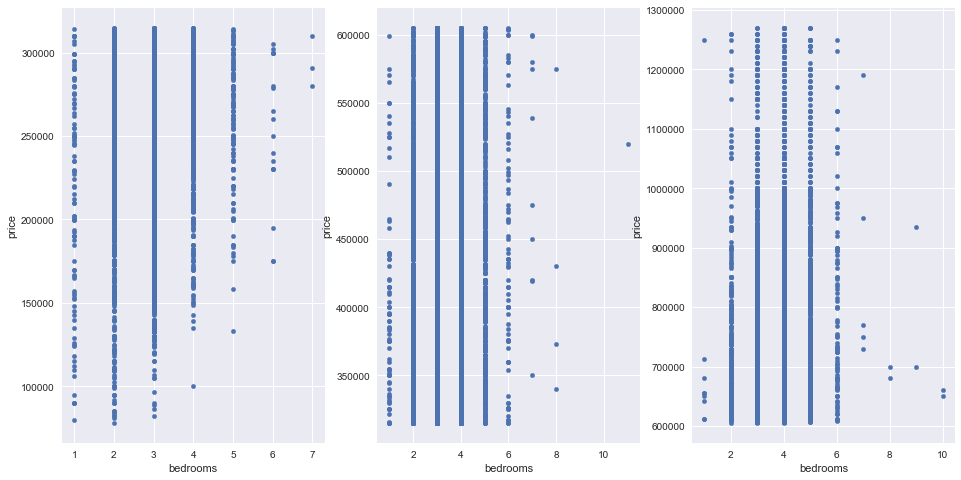

In [161]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='bedrooms', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='bedrooms', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='bedrooms', y='price', ax=axs[2])

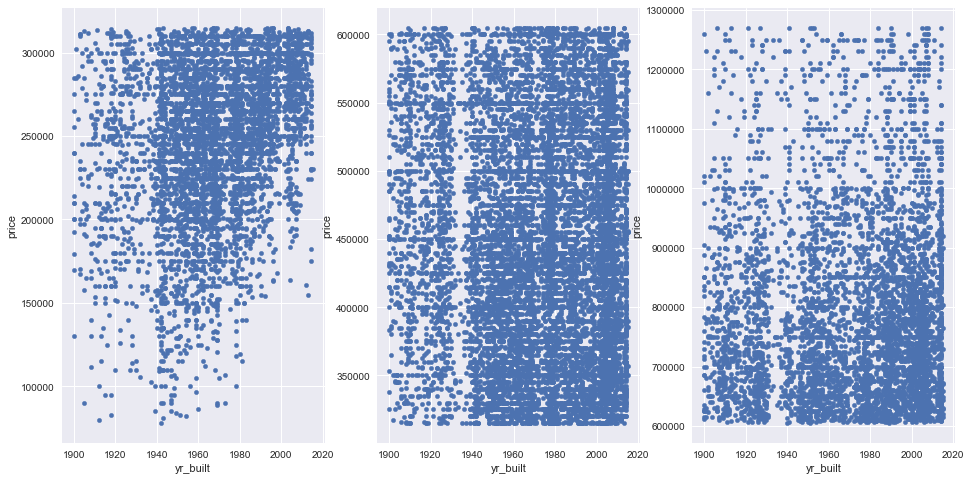

In [162]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='yr_built', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='yr_built', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='yr_built', y='price', ax=axs[2])

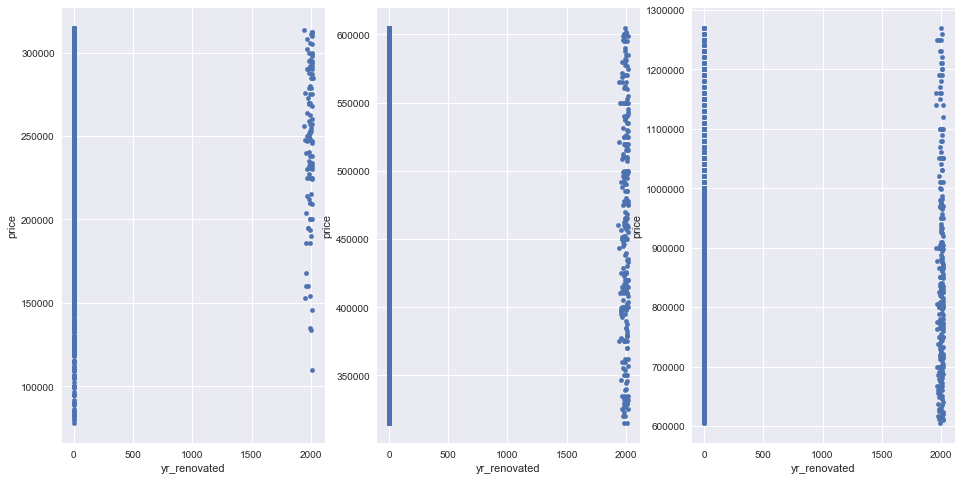

In [163]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='yr_renovated', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='yr_renovated', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='yr_renovated', y='price', ax=axs[2])

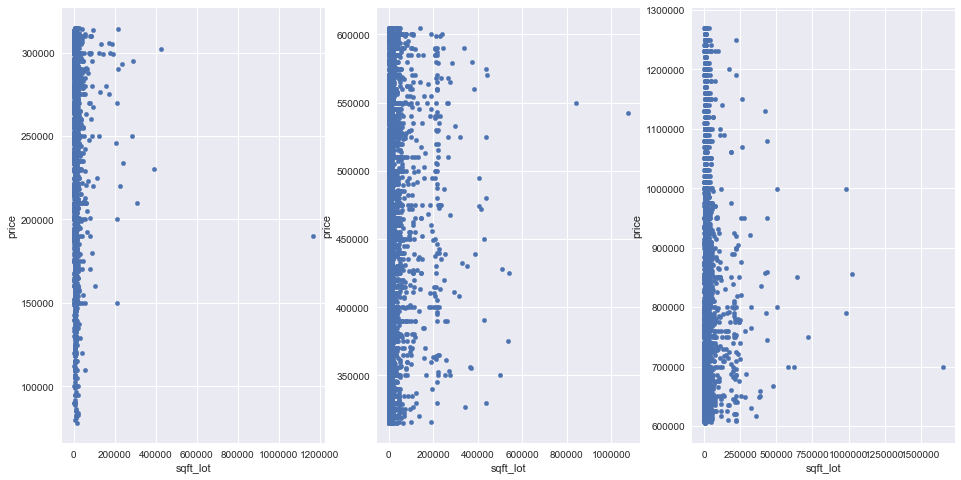

In [164]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='sqft_lot', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='sqft_lot', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='sqft_lot', y='price', ax=axs[2])

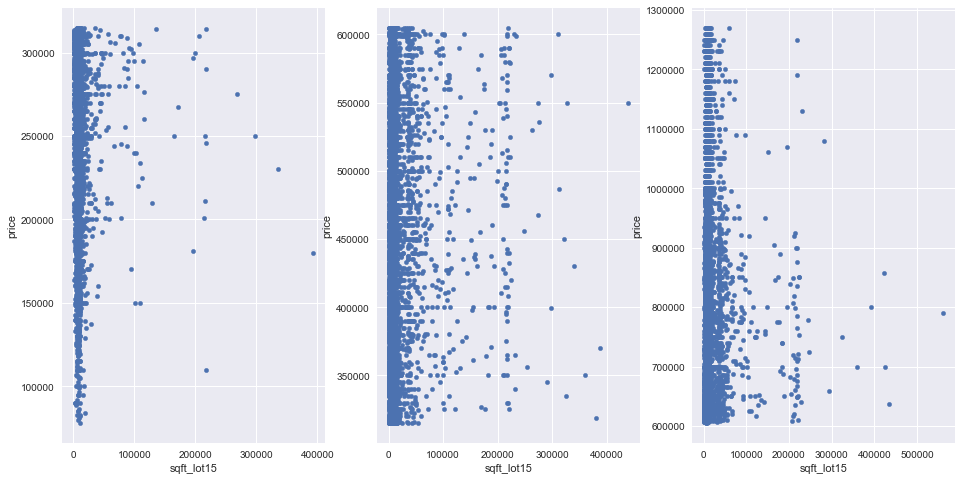

In [165]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='sqft_lot15', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='sqft_lot15', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='sqft_lot15', y='price', ax=axs[2])

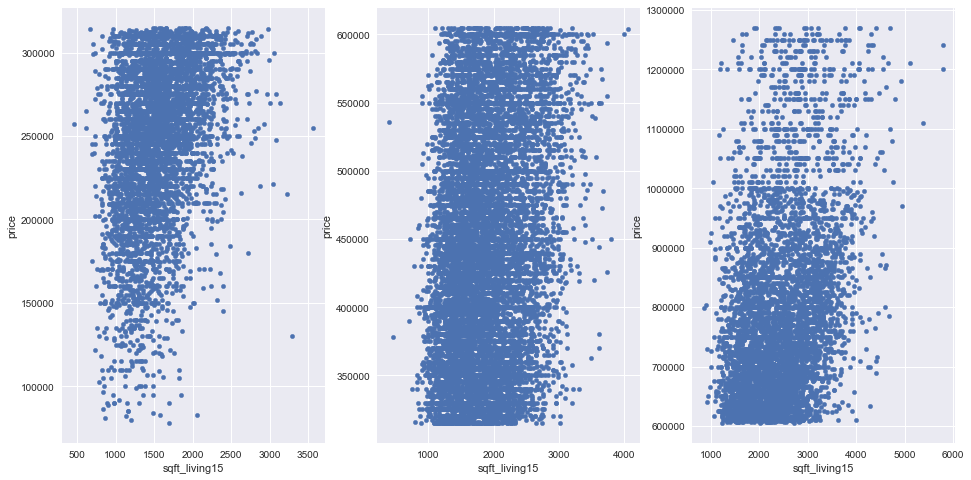

In [172]:
fig, axs = plt.subplots(1, 3,)
df3_low.plot(kind='scatter', x='sqft_living15', y='price', ax=axs[0], figsize=(16, 8))
df3_med.plot(kind='scatter', x='sqft_living15', y='price', ax=axs[1])
df3_high.plot(kind='scatter', x='sqft_living15', y='price', ax=axs[2])

In [174]:
desc_df2 = df3_low.describe()
desc_df2.loc['+2_std'] = desc_df2.loc['mean'] + (desc_df2.loc['std']*2)
desc_df2.loc['-2_std'] = desc_df2.loc['mean'] - (desc_df2.loc['std']*2)
desc_df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
count,5039.000000,5039.000000,5039.000000,5039.000000,5.039000e+03,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.0,5039.0,5039.0,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000
mean,246986.989085,3.016868,1.643233,1448.585037,1.045734e+04,1.263445,0.000397,0.037309,3.410399,6.781703,1302.815440,143.217503,1966.755309,41.481643,98075.098829,1545.030363,9799.478269,0.004167,0.038103,0.249057,0.592975,0.110736,0.004763,0.0,0.0,0.0,0.008335,0.370312,0.000198,0.108553,0.155785,0.104981,0.075412,0.146061,0.015678,0.011312,0.001191,0.001389
std,46463.245376,0.788409,0.601034,458.315877,2.384993e+04,0.440714,0.019920,0.287004,0.661913,0.724147,403.623756,285.060217,24.768316,284.395773,61.539255,380.390674,16151.744214,0.064428,0.191463,0.432510,0.491328,0.313836,0.068856,0.0,0.0,0.0,0.090924,0.482936,0.014087,0.311109,0.362687,0.306560,0.264081,0.353202,0.124238,0.105764,0.034490,0.037249
min,78000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,460.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,218475.000000,3.000000,1.000000,1100.000000,6.004500e+03,1.000000,0.000000,0.000000,3.000000,6.000000,1020.000000,0.000000,1951.000000,0.000000,98023.000000,1270.000000,6180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,254000.000000,3.000000,1.750000,1410.000000,7.800000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1240.000000,0.000000,1967.000000,0.000000,98055.000000,1510.000000,7826.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,284100.000000,3.000000,2.250000,1750.000000,9.734000e+03,1.500000,0.000000,0.000000,4.000000,7.000000,1540.000000,0.000000,1985.000000,0.000000,98126.000000,1770.000000,9450.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,314963.000000,7.000000,3.500000,3340.000000,1.164794e+06,3.000000,1.000000,4.000000,5.000000,9.000000,3340.000000,1570.000000,2015.000000,2015.000000,98198.000000,3557.000000,392040.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
+2_std,339913.479837,4.593687,2.845300,2365.216791,5.815720e+04,2.144874,0.040238,0.611317,4.734226,8.229997,2110.062952,713.337938,2016.291941,610.273190,98198.177340,2305.811712,42102.966697,0.133023,0.421030,1.114077,1.575632,0.738409,0.142474,0.0,0.0,0.0,0.190183,1.336184,0.028373,0.730771,0.881159,0.718100,0.603573,0.852465,0.264153,0.222840,0.070170,0.075888
-2_std,154060.498333,1.440050,0.441166,531.953282,-3.724252e+04,0.382016,-0.039444,-0.536699,2.086572,5.333408,495.567927,-426.902931,1917.218676,-527.309904,97952.020318,784.249014,-22504.010158,-0.124688,-0.344824,-0.615963,-0.389682,-0.516937,-0.132949,0.0,0.0,0.0,-0.173513,-0.595560,-0.027976,-0.513664,-0.569

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30169dd8>,
      dtype=object)

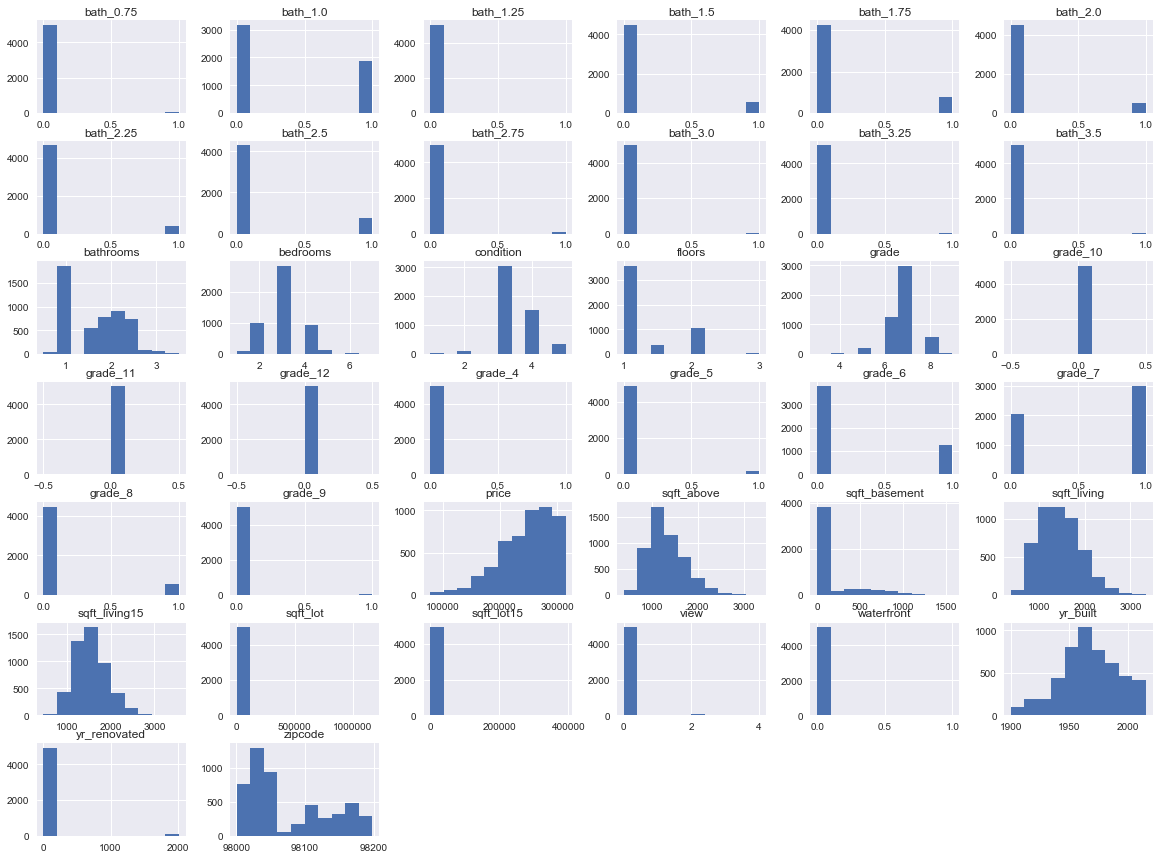

In [175]:
df3_low.hist(figsize=(20,15))

In [177]:
# too many variables for this approach
# pd.plotting.scatter_matrix(df3_low);
# plt.show()

In [181]:
df3_low['yr_built'].value_counts()

1968    144
1967    131
1962    129
1959    127
1969    116
       ... 
1904      6
1909      3
1901      2
1902      2
2015      1
Name: yr_built, Length: 116, dtype: int64

In [187]:
df3_low['yr_renovated'].value_counts()

0.0       4934
2014.0       9
1989.0       7
2013.0       6
1997.0       4
1983.0       4
2008.0       4
2007.0       4
2009.0       3
1984.0       3
1987.0       3
1985.0       3
1981.0       3
1968.0       3
2003.0       3
2004.0       2
1992.0       2
2001.0       2
1990.0       2
1993.0       2
1963.0       2
1964.0       2
1995.0       2
1967.0       2
1960.0       2
2006.0       2
1996.0       2
2005.0       1
2015.0       1
1986.0       1
1957.0       1
1973.0       1
1953.0       1
1945.0       1
1969.0       1
1975.0       1
1940.0       1
2012.0       1
1998.0       1
1977.0       1
2010.0       1
2000.0       1
1972.0       1
1965.0       1
1951.0       1
1988.0       1
1974.0       1
1950.0       1
1991.0       1
Name: yr_renovated, dtype: int64

In [ ]:
# SUMMARY: go with the low prices data set as it shows the best linear relationship
# Consider cutting down price a bit more (start at 154K? - 2SD below mean or at 200K - close to the 25 percentile)
# Key independent variables: bathrooms, bedrooms, grade, sqft_living OR sqft_above, year_built
# Optional / Questionable: condition, sqft_living15, zipcode

In [ ]:
# Questions / Ideas: 
# should we only include dummies that have reasonable occurance in the data (>10%)
# should we create dummies for bedrooms, condition?
# consider cutting outliers for yr_built (cut below 1940)
# consider banding / bining for yr_built?
# most independent variables above are categorical...small scaled... only large scales are price and sqft measures.
# ahould we consider some transformations for price? sqft? 

### Doing Modeling - original models from Approach A. 

In [103]:
from statsmodels.formula.api import ols

In [188]:
df3_remove.shape

(20452, 38)

In [104]:
# Try a first model - focus on home features and grade and condition

f = 'price~floors+bedrooms+bathrooms+view+waterfront+grade+condition'
# create a fitted model in one line
model = ols(formula=f, data=df3_remove).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     2536.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:29:00   Log-Likelihood:            -2.7420e+05
No. Observations:               20452   AIC:                         5.484e+05
Df Residuals:                   20444   BIC:                         5.485e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.034e+05   1.15e+04    -60.945      0.000   -7.26e+05   -6.81e+05
floors      3021.9274   2579.203      1.172      0.241   -2033.517    8077.372
bedrooms    1.689e+04   1504.909     11.226      0.000    1.39e+04    1.98e+04
bathrooms    1.83e+04   2443.812      7.487      0.000    1.35e+04    2.31e+04
view        5.418e+04   1818.466     29.795      0.000    5.06e+04    5.77e+04
waterfront  1.156e+05   2.18e+04      5.310      0.000    7.29e+04    1.58e+05
grade       1.215e+05   1421.326     85.516      0.000    1.19e+05    1.24e+05
condition   4.746e+04   1814.445     26.159      0.000    4.39e+04     5.1e+04
==============================================================================
Omnibus:                     1612.928   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2209.637
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       3.893   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# Try a second model - focus on hunches on most impactful

f = 'price~bedrooms+bathrooms+sqft_above+sqft_living+yr_built+grade'
# create a fitted model in one line
model = ols(formula=f, data=df3_high).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     322.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:57:03   Log-Likelihood:                -67188.
No. Observations:                5086   AIC:                         1.344e+05
Df Residuals:                    5079   BIC:                         1.344e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.448e+06   1.44e+05     23.875      0.000    3.16e+06    3.73e+06
bedrooms    -9063.7310   2559.918     -3.541      0.000   -1.41e+04   -4045.188
bathrooms    1.154e+04   4354.788      2.649      0.008    2999.053    2.01e+04
sqft_above    -13.6291      4.345     -3.137      0.002     -22.147      -5.111
sqft_living    73.9574      4.808     15.381      0.000      64.531      83.384
yr_built    -1673.1171     76.982    -21.734      0.000   -1824.035   -1522.200
grade        5.702e+04   2601.048     21.921      0.000    5.19e+04    6.21e+04
==============================================================================
Omnibus:                      690.551   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.969
Skew:                           0.976   Prob(JB):                    7.43e-228
Kurtosis:                       4.061   Cond. No.                     3.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


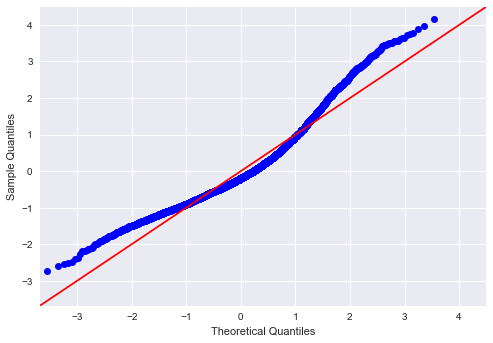

In [129]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [135]:
# Model 3: age and remodel with grade and one size proxy = bathrooms
f = 'price~bathrooms+yr_built+yr_renovated+grade'
model = ols(formula=f, data=df3_med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     439.1
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:35:48   Log-Likelihood:            -1.3077e+05
No. Observations:               10327   AIC:                         2.615e+05
Df Residuals:                   10322   BIC:                         2.616e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.166e+06    6.6e+04     32.789      0.000    2.04e+06     2.3e+06
bathrooms     2.439e+04   1597.817     15.264      0.000    2.13e+04    2.75e+04
yr_built     -1045.6826     35.569    -29.399      0.000   -1115.404    -975.961
yr_renovated    -1.8671      2.480     -0.753      0.451      -6.728       2.993
grade         3.918e+04   1191.076     32.895      0.000    3.68e+04    4.15e+04
==============================================================================
Omnibus:                      972.853   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.654
Skew:                           0.154   Prob(JB):                     1.93e-71
Kurtosis:                       2.186   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
# Model 4: minimal with just size and condition
f = 'price~sqft_living+condition+sqft_living15'
model = ols(formula=f, data=df3_med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     251.5
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.54e-157
Time:                        14:47:14   Log-Likelihood:            -1.3121e+05
No. Observations:               10327   AIC:                         2.624e+05
Df Residuals:                   10323   BIC:                         2.625e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.397e+05   5587.162     60.804      0.000    3.29e+05    3.51e+05
sqft_living      21.4700      1.686     12.731      0.000      18.164      24.776
condition      7968.9141   1271.549      6.267      0.000    5476.432    1.05e+04
sqft_living15    20.0281      2.147      9.329      0.000      15.820      24.236
==============================================================================
Omnibus:                     2279.040   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.952
Skew:                           0.168   Prob(JB):                    8.94e-103
Kurtosis:                       2.010   Cond. No.                     1.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
# Model 5: explore grade
f = 'price~condition+bathrooms+grade_5+grade_6+grade_7+grade_8+grade_9'
model = ols(formula=f, data=df3_med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     126.5
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          3.21e-179
Time:                        14:54:45   Log-Likelihood:            -1.3115e+05
No. Observations:               10327   AIC:                         2.623e+05
Df Residuals:                   10319   BIC:                         2.624e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.57e+05   1.01e+04     45.209      0.000    4.37e+05    4.77e+05
condition    1.33e+04   1292.932     10.289      0.000    1.08e+04    1.58e+04
bathrooms   3614.8596   1474.559      2.451      0.014     724.437    6505.282
grade_5    -1.096e+05   1.45e+04     -7.552      0.000   -1.38e+05   -8.12e+04
grade_6    -1.054e+05   9017.914    -11.690      0.000   -1.23e+05   -8.77e+04
grade_7     -7.85e+04   8474.162     -9.263      0.000   -9.51e+04   -6.19e+04
grade_8    -4.806e+04   8428.263     -5.702      0.000   -6.46e+04   -3.15e+04
grade_9    -1.968e+04   8804.485     -2.236      0.025   -3.69e+04   -2424.676
==============================================================================
Omnibus:                     1875.903   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.224
Skew:                           0.178   Prob(JB):                     5.69e-97
Kurtosis:                       2.049   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
df3_med.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
count,10327.000000,10327.000000,10327.000000,10327.000000,1.032700e+04,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.0,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000,10327.000000
mean,444501.438753,3.282948,2.028566,1889.437300,1.413658e+04,1.483345,0.001646,0.128111,3.379975,7.443110,1622.916142,260.717537,1972.008328,49.792098,98081.476615,1861.366128,12360.925245,0.000581,0.004454,0.071850,0.487460,0.354314,0.073109,0.007844,0.000387,0.0,0.002615,0.168684,0.000581,0.067783,0.166263,0.098673,0.107582,0.275395,0.049772,0.031374,0.015203,0.016074
std,82645.187607,0.852996,0.628109,629.131717,3.594423e+04,0.556522,0.040542,0.542188,0.622468,0.788765,609.686990,390.722780,29.329906,311.087311,50.449751,496.866485,26661.856822,0.024098,0.066595,0.258253,0.499867,0.478328,0.260328,0.088220,0.019678,0.0,0.051068,0.374491,0.024098,0.251386,0.372335,0.298237,0.309867,0.446735,0.217485,0.174335,0.122365,0.125768
min,315000.000000,1.000000,0.750000,410.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,410.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,748.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,374000.000000,3.000000,1.750000,1420.000000,4.681500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1952.000000,0.000000,98034.000000,1480.000000,4800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,437500.000000,3.000000,2.000000,1820.000000,7.210000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1470.000000,0.000000,1976.000000,0.000000,98072.000000,1790.000000,7287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,515000.000000,4.000000,2.500000,2290.000000,1.005050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1990.000000,500.000000,1999.000000,0.000000,98118.000000,2190.000000,9678.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,605000.000000,11.000000,3.500000,5461.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,11.000000,4750.000000,2196.000000,2015.000000,2015.000000,98199.000000,4050.000000,438213.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
# Model 6: explore grade with high price
f = 'price~condition+bathrooms+grade_5+grade_6+grade_7+grade_8+grade_9'
model = ols(formula=f, data=df3_high).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.68e-201
Time:                        14:58:14   Log-Likelihood:                -67532.
No. Observations:                5086   AIC:                         1.351e+05
Df Residuals:                    5078   BIC:                         1.351e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.226e+05   1.57e+04     46.151      0.000    6.92e+05    7.53e+05
condition   3.516e+04   3105.274     11.321      0.000    2.91e+04    4.12e+04
bathrooms   2.509e+04   3857.112      6.505      0.000    1.75e+04    3.27e+04
grade_5    -1.324e+05   7.12e+04     -1.861      0.063   -2.72e+05    7048.223
grade_6      -1.3e+05   2.36e+04     -5.515      0.000   -1.76e+05   -8.38e+04
grade_7    -1.861e+05   7809.434    -23.824      0.000   -2.01e+05   -1.71e+05
grade_8    -1.479e+05   6363.675    -23.237      0.000    -1.6e+05   -1.35e+05
grade_9    -9.251e+04   6076.616    -15.224      0.000   -1.04e+05   -8.06e+04
==============================================================================
Omnibus:                      700.583   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1032.333
Skew:                           1.020   Prob(JB):                    6.79e-225
Kurtosis:                       3.841   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# Model 7: Going back to the start ... similar to model 1
f = 'price~floors+bedrooms+bathrooms+view+waterfront+grade+condition'
# create a fitted model in one line
model = ols(formula=f, data=df3_med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     138.6
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          5.32e-196
Time:                        15:10:37   Log-Likelihood:            -1.3111e+05
No. Observations:               10327   AIC:                         2.622e+05
Df Residuals:                   10319   BIC:                         2.623e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.838e+05   9799.331     18.754      0.000    1.65e+05    2.03e+05
floors     -6290.1955   1706.812     -3.685      0.000   -9635.878   -2944.513
bedrooms     476.1865   1040.138      0.458      0.647   -1562.686    2515.059
bathrooms   4833.4534   1712.690      2.822      0.005    1476.249    8190.658
view        9587.0110   1498.986      6.396      0.000    6648.707    1.25e+04
waterfront -5416.7224      2e+04     -0.271      0.786   -4.46e+04    3.37e+04
grade       2.935e+04   1198.341     24.491      0.000     2.7e+04    3.17e+04
condition   1.155e+04   1326.789      8.703      0.000    8945.765    1.41e+04
==============================================================================
Omnibus:                     1800.273   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.979
Skew:                           0.184   Prob(JB):                     2.88e-96
Kurtosis:                       2.058   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model errors for baseline

### After run a few models - check assumptions

In [ ]:
# Plot the Model - single linear

# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new) #predicts the start/end of line
print (preds)

# first, plot the observed data and the least squares line
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

In [ ]:
# QQ Plot - single linear
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
# Residual Plot - single linear
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

### EXTRA Stuff: 

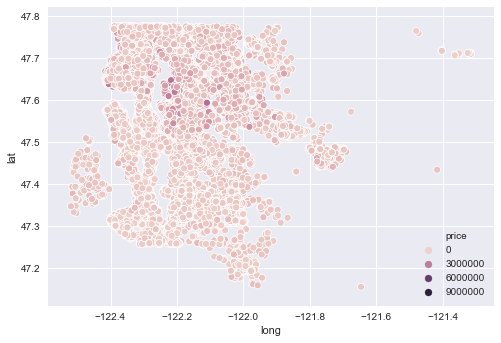

In [180]:
# plt.scatter(df.lat, df.long)
sns.scatterplot(df.long, df.lat, hue=df.price)